In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [37]:
# parameters
lr = 0.01
epochs = 50000
batch_size = 256
disp_step = 1000
examples_to_show = 10

In [28]:
# PARAMETERS 
hidd1 = 256
hidd2 = 128
num_in = 784
# num_out = 10

# i/o
X = tf.placeholder(tf.float32, [None, num_in])
# Y = tf.placeholder(tf.float32, [None, num_out])

# weights as dictionaries
weights = {
    'encoder_w1': tf.Variable(tf.random_normal([num_in, hidd1])),
    'encoder_b1': tf.Variable(tf.random_normal([hidd1])),
    'encoder_w2': tf.Variable(tf.random_normal([hidd1, hidd2])),
    'encoder_b2': tf.Variable(tf.random_normal([hidd2])),
    #
    'decoder_w1': tf.Variable(tf.random_normal([hidd2, hidd1])),
    'decoder_b1': tf.Variable(tf.random_normal([hidd1])),
    'decoder_w2': tf.Variable(tf.random_normal([hidd1, num_in])),
    'decoder_b2': tf.Variable(tf.random_normal([num_in])),
}

In [29]:
# DEFINE MODEL wrappers

def encoder(x):
    lay1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_w1']), weights['encoder_b1']))
    lay2 = tf.nn.sigmoid(tf.add(tf.matmul(lay1, weights['encoder_w2']), weights['encoder_b2']))
    return lay2
    

def decoder(x):
    lay1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_w1']), weights['decoder_b1']))
    lay2 = tf.nn.sigmoid(tf.add(tf.matmul(lay1, weights['decoder_w2']), weights['decoder_b2']))
    return lay2


In [30]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [31]:
# EVALUATION
y_pred = decoder_op
y_true = X


In [32]:
# COST (MSE)
op_cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))

In [33]:
# OPTIMISATION
op_optimizer = tf.train.RMSPropOptimizer(learning_rate=lr).minimize(op_cost)


In [34]:
# INIT
init = tf.global_variables_initializer()

In [38]:
###  TRAINING SESSION
s = tf.Session()
s.run(init)

for i in range(epochs):
    batch_xs, _ = mnist.train.next_batch(batch_size)
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = s.run([op_optimizer, op_cost], feed_dict={X: batch_xs})
    # Display logs per step
    if i % disp_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
    

Step 0: Minibatch Loss: 0.454057
Step 1: Minibatch Loss: 0.454357
Step 1000: Minibatch Loss: 0.121135
Step 2000: Minibatch Loss: 0.108474
Step 3000: Minibatch Loss: 0.096239
Step 4000: Minibatch Loss: 0.085684
Step 5000: Minibatch Loss: 0.085845
Step 6000: Minibatch Loss: 0.086568
Step 7000: Minibatch Loss: 0.080708
Step 8000: Minibatch Loss: 0.075770
Step 9000: Minibatch Loss: 0.071958
Step 10000: Minibatch Loss: 0.072041
Step 11000: Minibatch Loss: 0.067674
Step 12000: Minibatch Loss: 0.066246
Step 13000: Minibatch Loss: 0.068358
Step 14000: Minibatch Loss: 0.066924
Step 15000: Minibatch Loss: 0.065002
Step 16000: Minibatch Loss: 0.064989
Step 17000: Minibatch Loss: 0.064256
Step 18000: Minibatch Loss: 0.062424
Step 19000: Minibatch Loss: 0.060296
Step 20000: Minibatch Loss: 0.058592
Step 21000: Minibatch Loss: 0.055398
Step 22000: Minibatch Loss: 0.058016
Step 23000: Minibatch Loss: 0.054765
Step 24000: Minibatch Loss: 0.053305
Step 25000: Minibatch Loss: 0.053335
Step 26000: Miniba

Original Images


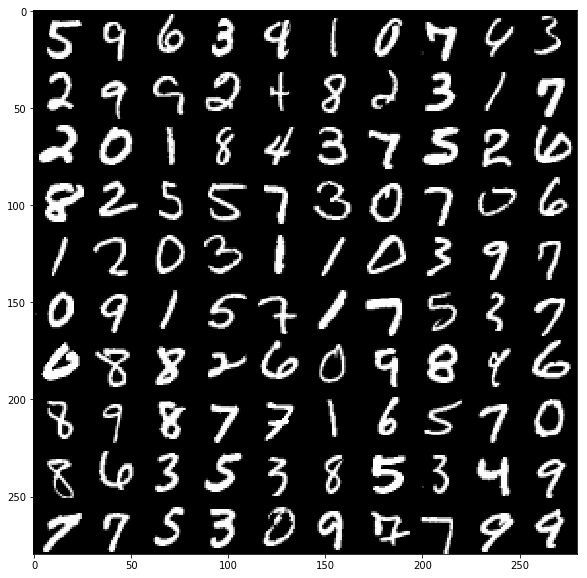

Reconstructed Images


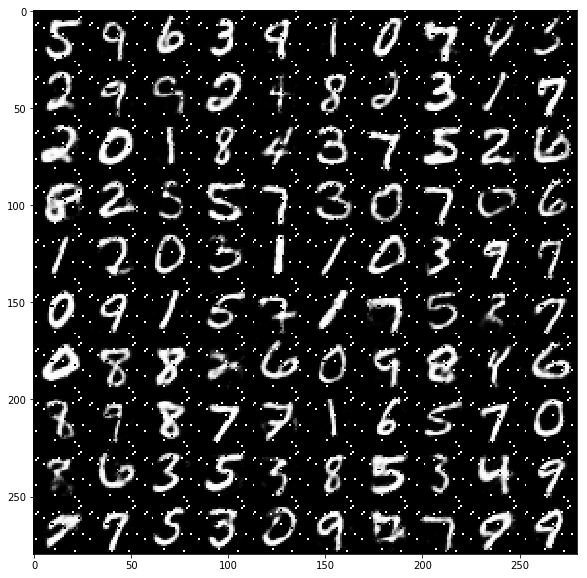

In [39]:
###  TESTING SESSION
# Encode and decode images from test set and visualize their reconstruction.
n = examples_to_show
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = s.run(decoder_op, feed_dict={X: batch_x})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])


print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

